### Задача №10

Шахматная доска 8х8 клеток имеет длину клетки 0.2. Начало мировой
системы координат находится в левом нижнем углу, оси X и Y направлены вдоль
сторон клеток, ось Z перпендикулярна плоскости доски. Используя внутренние
параметры и положение камеры относительно мировой системы координат из
задачи 6 (второе домашнее задание), и предполагая отсутствие дисторсии, найти
координаты проекций углов клеток на плоскость изображения. Затем решить
задачу PnP, используя функцию cv2.solvePnPGeneric, для трехмерных координат
клеток в мировой системе координат и найденных двумерных проекций. Сравнить
полученные поворот и трансляцию с взятыми из задачи 6. Если результаты
получаются неожиданными, объяснить.


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2

K = np.matrix([[400, 0, 960],
                [0, 400, 540],
                [0, 0, 1]], dtype=np.float32)

RT = np.matrix([[math.cos(math.pi/4), -math.sin(math.pi/4), 0, 0],
                [math.sin(math.pi/4), math.cos(math.pi/4), 0, 0],
                [0, 0, 1, 10]], dtype=np.float32)

P = K.dot(RT)
print(f"Матрица проекции камеры:\n{P}")

Матрица проекции камеры:
[[ 2.828427e+02 -2.828427e+02  9.600000e+02  9.600000e+03]
 [ 2.828427e+02  2.828427e+02  5.400000e+02  5.400000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+01]]


In [2]:
list_of_points = np.array([(x, y, 0, 1) for x in np.arange(0, 1.8, 0.2) for y in np.arange(0, 1.8, 0.2)])

In [3]:
list_of_x_2d = []
list_of_y_2d = []
list_of_points_2d = []

for p in list_of_points:
    uvw =np.squeeze(np.asarray(P.dot(p))) 
    list_of_x_2d.append(int(uvw[0]/uvw[2]))
    list_of_y_2d.append(int(uvw[1]/uvw[2]))
    list_of_points_2d.append((int(uvw[0]/uvw[2]), int(uvw[1]/uvw[2])))

Text(0.5, 1.0, 'Точки на изображении')

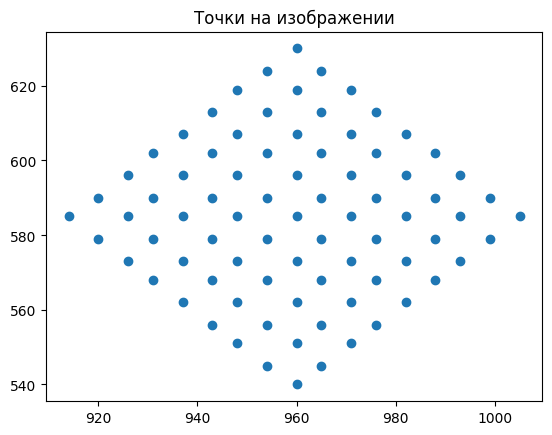

In [4]:
plt.scatter(list_of_x_2d, list_of_y_2d)
plt.title("Точки на изображении")

In [5]:
list_of_points = np.array([(x, y, 0) for x in np.arange(0, 1.8, 0.2) for y in np.arange(0, 1.8, 0.2)])

In [6]:
_, rotation_vector, trasnlation_vector, _ = cv2.solvePnPGeneric(np.array(list_of_points, dtype=np.float32).reshape(-1, 3), np.array(list_of_points_2d, dtype=np.float32).reshape(-1, 2), K, None)
print(f"Вектор поворота:\n{rotation_vector}\nВектор трансляции:\n{trasnlation_vector}")

Вектор поворота:
(array([[-0.03706585],
       [-0.00577996],
       [ 0.7863512 ]]),)
Вектор трансляции:
(array([[-9.79790418e-03],
       [-1.09948798e-02],
       [ 1.00682758e+01]]),)


In [7]:
theta1, theta2, theta3 = (rotation_vector[0]).T[0]

R_x = np.array([[1, 0, 0],
                [0, np.cos(theta1), -np.sin(theta1)],
                [0, np.sin(theta1), np.cos(theta1)]])
R_y = np.array([[np.cos(theta2), 0, np.sin(theta2)],
                [0, 1, 0],
                [-np.sin(theta2), 0, np.cos(theta2)]])
R_z = np.array([[np.cos(theta3), -np.sin(theta3), 0],
                [np.sin(theta3), np.cos(theta3), 0],
                [0, 0, 1]])

print(f"Получившаяся матрица поворота и трансляции:\n{np.concatenate((R_x.dot(R_y).dot(R_z), trasnlation_vector[0]), axis=1)}")

Получившаяся матрица поворота и трансляции:
[[ 7.06420762e-01 -7.07768535e-01 -5.77993262e-03 -9.79790418e-03]
 [ 7.07445522e-01  7.05795743e-01  3.70567478e-02 -1.09948798e-02]
 [-2.21481483e-02 -3.02666435e-02  9.99296447e-01  1.00682758e+01]]


In [8]:
print(f"Исходная матрица поворота и трансляции:\n{RT}")

Исходная матрица поворота и трансляции:
[[ 0.70710677 -0.70710677  0.          0.        ]
 [ 0.70710677  0.70710677  0.          0.        ]
 [ 0.          0.          1.         10.        ]]


Как видно, разница между матрицами находится в районе допустимой погрешности

### Задача №12

Используя матрицу внутренних параметров
https://drive.google.com/file/d/1A4H84PLy7971Xd1ErS1bRRupWk9_TCYI/view?usp=sharing, запустить функцию cv2.undistort() на изображении
https://drive.google.com/file/d/1mC0PI9k4q_wJt9iAn6uosEVSJb9PcZIk/view?usp=sharing, и записать в файл изображение с компенсацией искажений линзы.

In [9]:
import xml.etree.ElementTree as ET

xml_file = ET.parse(f'./Resourses/camera.xml')
root = xml_file.getroot()

xml_iter = root.iter("data")
camera_matrix = np.array(next(xml_iter).text.split(), np.float32).reshape(3, 3)
distortion_coefficients = np.array(next(xml_iter).text.split(), np.float32).reshape(14)

print(f"Матрица камеры:\n{camera_matrix}")
print(f"Коэффициенты дисторсии:\n{distortion_coefficients}")

Матрица камеры:
[[425.81152   0.      481.75803]
 [  0.      435.33255 267.43704]
 [  0.        0.        1.     ]]
Коэффициенты дисторсии:
[ 4.4429002e+00  2.7649031e+00 -4.5203902e-03 -1.8217806e-03
  0.0000000e+00  4.7056575e+00  3.9343290e+00  3.3910745e-01
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00]


Text(0.5, 1.0, 'Исходное изображение')

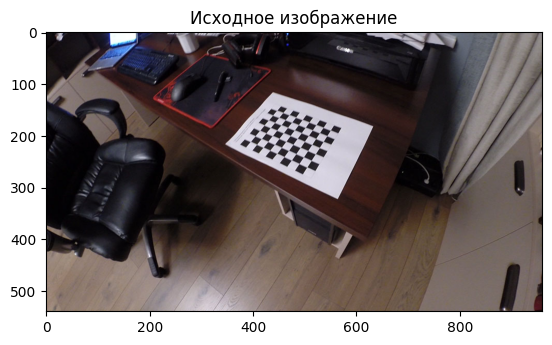

In [10]:
img = cv2.cvtColor(cv2.imread("./Resourses/image.jpg"), cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.title("Исходное изображение")

Text(0.5, 1.0, 'Изображение с компенсацией искажений линзы')

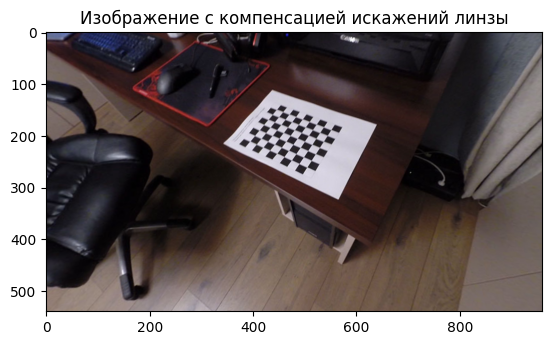

In [11]:
new_img = cv2.undistort(img, camera_matrix, distortion_coefficients)
cv2.imwrite("./Resourses/undistorted_image.jpg", cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.imshow(new_img)
plt.title("Изображение с компенсацией искажений линзы")

### Задача №13

Первая камера повернута относительно второй на 45 градусов по оси z и
сдвинута на 10 вдоль направления оси x второй камеры. У обеих камер матрицы
внутренних параметров единичные. Найти и распечатать фундаментальную
матрицу.


In [12]:
K1 = np.matrix([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]], dtype=np.float32)

K2 = np.matrix([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]], dtype=np.float32)
                
R1 = np.matrix([[math.cos(math.pi/4), -math.sin(math.pi/4), 0],
                [math.sin(math.pi/4), math.cos(math.pi/4), 0],
                [0, 0, 1]], dtype=np.float32)
                
R2 = np.matrix([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]], dtype=np.float32)

T1 = np.array([10, 0, 0])
T2 = np.array([0, 0, 0])

In [13]:
def find_fundamental_matrix(K1, K2, R1, R2, T1, T2):
    T2x, T2y, T2z = T2
    T2_crest = np.array([[0, -T2z, T2y],
                         [T2z, 0, -T2x],
                         [-T2y, T2x, 0]])
                         
    return np.linalg.inv(K2).T.dot(T2_crest).dot(R2).dot(R1.T).dot(np.linalg.inv(K1))

In [14]:
F = find_fundamental_matrix(K2, K1, R2, R1, T2, T1)
print(f"Фундаментальная матрица:\n{F}")

Фундаментальная матрица:
[[  0.           0.           0.        ]
 [  0.           0.         -10.        ]
 [  7.07106769   7.07106769   0.        ]]


### Задача №14

Первая камера повернута относительно мировой системы координат на
45 градусов по оси z, а вторая – на -45 градусов по оси у и сдвинута на 10 в
направлении оси x. У обеих камер матрицы внутренних параметров единичные.
Найти и распечатать фундаментальную матрицу

In [15]:
K1 = np.matrix([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]], dtype=np.float32)

K2 = np.matrix([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]], dtype=np.float32)
                
R1 = np.matrix([[math.cos(math.pi/4), -math.sin(math.pi/4), 0],
                [math.sin(math.pi/4), math.cos(math.pi/4), 0],
                [0, 0, 1]], dtype=np.float32)
                
R2 = np.matrix([[np.cos(-math.pi/4), 0, np.sin(-math.pi/4)],
                [0, 1, 0],
                [-np.sin(-math.pi/4), 0, np.cos(-math.pi/4)]])

T1 = np.array([0, 0, 0])
T2 = np.array([10, 0, 0])

In [16]:
F = find_fundamental_matrix(K1, K2, R1, R2, T1, T2)
print(f"Фундаментальная матрица:\n{F}")

Фундаментальная матрица:
[[ 0.          0.          0.        ]
 [-4.99999991 -4.99999991 -7.07106781]
 [-7.07106769  7.07106769  0.        ]]


### Задача №15

В задаче 14 найти и распечатать оба эпиполя

In [17]:
def find_epipoles(F):
    u1, s1, vh1 = np.linalg.svd(F.T)
    e1 = vh1.T[:, np.isclose(s1, 0)]
    u2, s2, vh2 = np.linalg.svd(F)
    e2 = vh2.T[:, np.isclose(s2, 0)]
    return e1, e2

e1, e2 = find_epipoles(F)
print(f"Эпиполи:\ne1: {e1.T[0]}\ne2: {e2.T[0]}")

Эпиполи:
e1: [[1. 0. 0.]]
e2: [[ 0.5         0.5        -0.70710678]]


### Задача №16

В задаче 14 найти и распечатать эпиполярную линию, проходящую через точку
(0,0) на первом изображении, и соответствующую ей линию на втором
изображении.

In [20]:
start_point = np.array([0, 0])
l1 = np.cross(e1.T, np.insert(start_point, 2, 1))
l2 = np.dot(F.T, np.insert(start_point, 2, 1))
print(f"Эпиполярные линии:\n{l1}\n{l2}")

Эпиполярные линии:
[[ 0. -1.  0.]]
[[-7.07106769  7.07106769  0.        ]]
